In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IRIS_DF = pd.read_csv(os.getcwd() + '/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [6]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10)

In [7]:
X = IRIS_DF.iloc[:,:4]

In [8]:
y = IRIS_DF.iloc[:,4]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])

In [15]:
rf['correct'] =rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf

,predicted,actual,correct
0,Iris-virginica,Iris-virginica,1
1,Iris-virginica,Iris-virginica,1
2,Iris-versicolor,Iris-versicolor,1
3,Iris-setosa,Iris-setosa,1
4,Iris-virginica,Iris-virginica,1
5,Iris-virginica,Iris-virginica,1
6,Iris-versicolor,Iris-versicolor,1
7,Iris-virginica,Iris-virginica,1
8,Iris-versicolor,Iris-versicolor,1
9,Iris-virginica,Iris-virginica,1


In [16]:
rf['correct'].sum()/rf['correct'].count()

0.9555555555555556

([<matplotlib.axis.XTick at 0x7fb4f35ce320>,
 <a list of 4 Text xticklabel objects>)

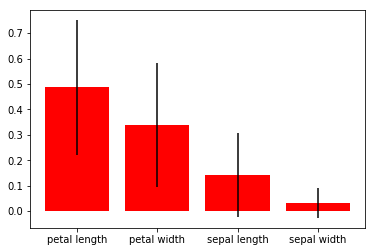

In [21]:
f_importances = clf.feature_importances_
f_names = IRIS_DF.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)
imps = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]
plt.bar(range(len(f_importances)), imps, color="r", yerr=errs, align="center")
plt.xticks(range(len(f_importances)), labels)

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
clf = OneVsRestClassifier(SVC(kernel='linear'))
X = IRIS_DF.iloc[:,:4]
y = np.array(IRIS_DF.iloc[:,4]).astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf

,predicted,actual,correct
0,Iris-virginica,Iris-virginica,1
1,Iris-virginica,Iris-virginica,1
2,Iris-virginica,Iris-versicolor,0
3,Iris-setosa,Iris-setosa,1
4,Iris-versicolor,Iris-versicolor,1
5,Iris-virginica,Iris-virginica,1
6,Iris-virginica,Iris-virginica,1
7,Iris-setosa,Iris-setosa,1
8,Iris-versicolor,Iris-versicolor,1
9,Iris-setosa,Iris-setosa,1


In [23]:
rf['correct'].sum()/rf['correct'].count()

0.9555555555555556